## Machine learning modeling - Iteration #4


In [23]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy.stats.mstats import winsorize
from scipy.stats import zscore, stats
from math import ceil
import jenkspy
import statsmodels
import statsmodels.api as sm

# ml modules
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [91]:
# read in 990 data that has been
# with features already adjusted in 2nd iteration
df_dummies = pd.read_csv('data/990_model_data_4.csv')

In [92]:
df_dummies.shape

(26881, 27)

In [93]:
df_dummies.head()

,gross_receipts,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,contractor_100k_ct,CON_CT_DIV_EMP_VOL_CT,CON_EXP_DIV_TOT_EXP,CON_CT_DIV_EMP_VOL_CT_flag,CON_EXP_DIV_TOT_EXP_flag,TARGET_FEATURE,rev_PCA,exp_PCA,exempt_status_501c_txt_3_,exempt_status_501c_txt_4_,exempt_status_501c_txt_6_,asset_PCA
0,15549792.0,11,11,37,0.0,0.0,0.0,0.0,39372255.0,26541056.0,12831199.0,0.0,39367859.0,26785093.0,12582766.0,3,0.081081,0.061503,True,False,False,-9.230988e+07,-7.560677e+07,0,0,0,-9.988990e+07
1,9472036.0,9,8,81,8.0,52565.0,-75519.0,1000243.0,173898488.0,157544120.0,16354368.0,1262299.0,188534687.0,170915216.0,17619471.0,3,0.033708,0.137033,False,False,False,-1.057983e+08,-9.231641e+07,0,0,0,8.416525e+07
2,8503978.0,21,19,53,200.0,16110.0,0.0,-55531.0,3510564.0,820701.0,2689863.0,69972.0,3640881.0,852359.0,2788522.0,3,0.011858,0.053652,False,False,False,-1.072903e+08,-9.229491e+07,0,0,0,-1.516665e+08
3,57422298.0,8,7,442,15.0,0.0,0.0,2553132.0,57577945.0,13230564.0,44347381.0,90630.0,56726534.0,12198910.0,44527624.0,8,0.017505,0.039592,False,False,False,-1.765087e+07,-1.757254e+07,1,0,0,-5.797805e+07
4,5974176.0,12,12,139,50.0,2437.0,1437.0,344252.0,9803605.0,3104088.0,6699517.0,745724.0,10535130.0,3089889.0,7445241.0,1,0.005291,0.039945,False,False,False,-1.162458e+08,-9.964548e+07,0,0,0,-1.406094e+08


## 4th Feature Iteration - bin categories that are contributing the most information into sub-groups 

### gross_receipts

In [95]:
df['gr_breaks'] = pd.cut(df.gross_receipts,
                        bins=gr_breaks,
                        include_lowest=True)

In [96]:
# examin count in each category
df_dummies.gr_breaks.value_counts()

(-0.001, 25507108.0]            17944
(25507108.0, 71194601.0]         4588
(71194601.0, 140849833.0]        1778
(140849833.0, 234449446.0]        896
(234449446.0, 351172329.0]        500
(1147856790.0, 1309779237.2]      344
(351172329.0, 491279446.0]        340
(491279446.0, 665633697.0]        225
(665633697.0, 890053921.0]        158
(890053921.0, 1147856790.0]       108
Name: gr_breaks, dtype: int64

### contractor_100k_ct

In [97]:
# create breaks in contractor_100K_count
cont_breaks = jenkspy.jenks_breaks(df_dummies.contractor_100k_ct, nb_class=10)

In [98]:
df_dummies['cont_breaks'] = pd.cut(df_dummies.contractor_100k_ct,
                        bins=cont_breaks,
                        include_lowest=True)

In [99]:
# examin count in each category
df_dummies.cont_breaks.value_counts()

(0.999, 3.0]      15619
(3.0, 9.0]         6129
(9.0, 18.0]        2073
(18.0, 30.0]       1115
(30.0, 45.0]        644
(45.0, 64.0]        434
(148.0, 167.0]      310
(64.0, 87.0]        280
(87.0, 115.0]       164
(115.0, 148.0]      113
Name: cont_breaks, dtype: int64

In [100]:
df_dummies.head()

,gross_receipts,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,contractor_100k_ct,CON_CT_DIV_EMP_VOL_CT,CON_EXP_DIV_TOT_EXP,CON_CT_DIV_EMP_VOL_CT_flag,CON_EXP_DIV_TOT_EXP_flag,TARGET_FEATURE,rev_PCA,exp_PCA,exempt_status_501c_txt_3_,exempt_status_501c_txt_4_,exempt_status_501c_txt_6_,asset_PCA,gr_breaks,cont_breaks
0,15549792.0,11,11,37,0.0,0.0,0.0,0.0,39372255.0,26541056.0,12831199.0,0.0,39367859.0,26785093.0,12582766.0,3,0.081081,0.061503,True,False,False,-9.230988e+07,-7.560677e+07,0,0,0,-9.988990e+07,"(-0.001, 25507108.0]","(0.999, 3.0]"
1,9472036.0,9,8,81,8.0,52565.0,-75519.0,1000243.0,173898488.0,157544120.0,16354368.0,1262299.0,188534687.0,170915216.0,17619471.0,3,0.033708,0.137033,False,False,False,-1.057983e+08,-9.231641e+07,0,0,0,8.416525e+07,"(-0.001, 25507108.0]","(0.999, 3.0]"
2,8503978.0,21,19,53,200.0,16110.0,0.0,-55531.0,3510564.0,820701.0,2689863.0,69972.0,3640881.0,852359.0,2788522.0,3,0.011858,0.053652,False,False,False,-1.072903e+08,-9.229491e+07,0,0,0,-1.516665e+08,"(-0.001, 25507108.0]","(0.999, 3.0]"
3,57422298.0,8,7,442,15.0,0.0,0.0,2553132.0,57577945.0,13230564.0,44347381.0,90630.0,56726534.0,12198910.0,44527624.0,8,0.017505,0.039592,False,False,False,-1.765087e+07,-1.757254e+07,1,0,0,-5.797805e+07,"(25507108.0, 71194601.0]","(3.0, 9.0]"
4,5974176.0,12,12,139,50.0,2437.0,1437.0,344252.0,9803605.0,3104088.0,6699517.0,745724.0,10535130.0,3089889.0,7445241.0,1,0.005291,0.039945,False,False,False,-1.162458e+08,-9.964548e+07,0,0,0,-1.406094e+08,"(-0.001, 25507108.0]","(0.999, 3.0]"


In [101]:
# create features for classification
# while removing those I created in designing
# my target variable
X = pd.get_dummies(df_dummies).drop(['TARGET_FEATURE',
            'CON_CT_DIV_EMP_VOL_CT_flag', 
             'CON_EXP_DIV_TOT_EXP_flag',
            'CON_CT_DIV_EMP_VOL_CT',
            'CON_EXP_DIV_TOT_EXP',
            'volunteer_tot_ct',
            'employee_tot_ct'], axis=1)

# create target for classification
y = df_dummies.TARGET_FEATURE

In [102]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Random Forrest Classifier 


In [103]:
# create model, check for overfitting
rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=8)

cross_val_score(rfc, X, y, cv=5)

array([0.8992003 , 0.89938627, 0.90383185, 0.90215774, 0.90716279])

In [104]:
rfc.fit(X_train, y_train)

predict_train = rfc.predict(X_train)
predict_test = rfc.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.001488095238095238
Percent Type II errors: 0.08468191964285714

Test set accuracy:
Percent Type I errors: 0.004835410079970244
Percent Type II errors: 0.08387576715640692


In [105]:
# training results
pd.DataFrame(data=confusion_matrix(y_train, predict_train)[:,:],    
              index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

,Predicted: No,Predicted: Yes
Actual: No,19112,32
Actual: Yes,1821,539


In [106]:
# testing results
pd.DataFrame(data=confusion_matrix(y_test, predict_test)[:,:],    
              index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

,Predicted: No,Predicted: Yes
Actual: No,4802,26
Actual: Yes,451,98


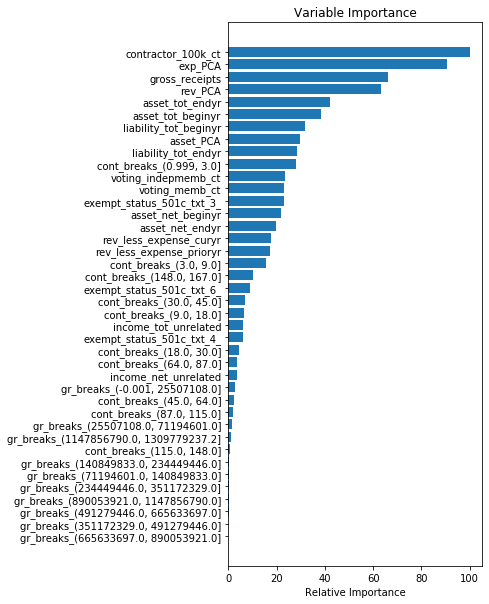

In [110]:
# visualize feature importances
plt.figure(figsize=(10, 10))

feature_importance = 100.0 * (rfc.feature_importances_ / rfc.feature_importances_.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

### Support Vector Classifier

In [108]:
# create model, check for overfitting
svc = SVC(gamma='scale', C= .00001, class_weight=  'balanced')

svc.fit(X_train, y_train)

cross_val_score(svc, X, y, cv=5)

array([0.89176121, 0.89176121, 0.89174107, 0.89174107, 0.89190698])

In [112]:
predict_train = svc.predict(X_train)
predict_test = svc.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

# train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
# train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

# test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
# test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

# print((
#     'Training set accuracy:\n'
#     'Percent Type I errors: {}\n'
#     'Percent Type II errors: {}\n\n'
#     'Test set accuracy:\n'
#     'Percent Type I errors: {}\n'
#     'Percent Type II errors: {}'
# ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Something clearly isn't right about this.

In [113]:
# training results
pd.DataFrame(data=confusion_matrix(y_train, predict_train)[:,:],    
              index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

,Predicted: No,Predicted: Yes
Actual: No,0,19144
Actual: Yes,0,2360


In [114]:
# testing results
pd.DataFrame(data=confusion_matrix(y_test, predict_test)[:,:],    
              index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

,Predicted: No,Predicted: Yes
Actual: No,0,4828
Actual: Yes,0,549


xxx

### Gradient Boost Classifier

In [115]:
# Initialize and fit the model.
params = {'n_estimators': 950,
          'max_depth': 2,
          'subsample': .8,
          'learning_rate': .1,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
cross_val_score(clf, X, y, cv=5)

array([0.91370653, 0.91277664, 0.90792411, 0.91331845, 0.92353488])

In [116]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.011160714285714286
Percent Type II errors: 0.05324590773809524

Test set accuracy:
Percent Type I errors: 0.022503254602938443
Percent Type II errors: 0.055421238608889714


In [117]:
pd.DataFrame(data=confusion_matrix(y_train, predict_train)[:,:],    
              index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

,Predicted: No,Predicted: Yes
Actual: No,18904,240
Actual: Yes,1145,1215


In [118]:
pd.DataFrame(data=confusion_matrix(y_test, predict_test)[:,:],    
              index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

,Predicted: No,Predicted: Yes
Actual: No,4707,121
Actual: Yes,298,251


xxx

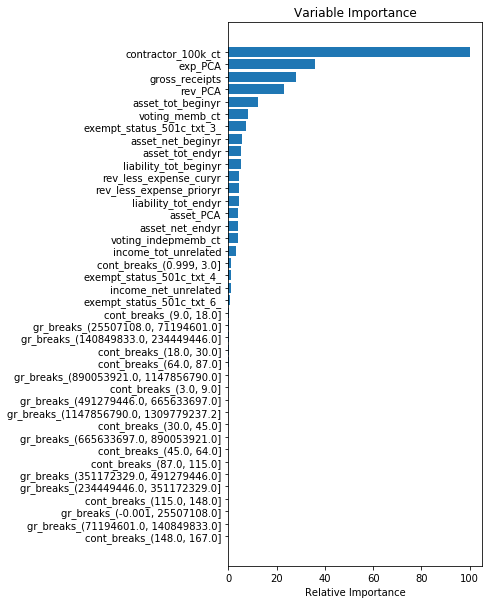

In [119]:
# visualize feature importances
plt.figure(figsize=(10, 10))

feature_importance = 100.0 * (clf.feature_importances_ / clf.feature_importances_.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

Segmenting gross receipts & count of contractors into categories was not helpful at contributing information that helped my model perform more accurately.

In [120]:
# find 10 most significant features
clf_features = pd.DataFrame(clf.feature_importances_,
            X.columns, columns=['importance']).sort_values(by='importance', ascending=False)

list(clf_features.head(10).index)

['contractor_100k_ct',
 'exp_PCA',
 'gross_receipts',
 'rev_PCA',
 'asset_tot_beginyr',
 'voting_memb_ct',
 'exempt_status_501c_txt_3_',
 'asset_net_beginyr',
 'asset_tot_endyr',
 'liability_tot_beginyr']

### Export data for further feature iteration

In [123]:
df_dummies.to_csv('data/990_model_data_5.csv', index=None, header=True)